In [ ]:
# 下载所需库。本地部署只需要在首次开启时运行一次此cell
#
!pip install pandas -i https://pypi.tuna.tsinghua.edu.cn/simple some-package
!pip install numpy -i https://pypi.tuna.tsinghua.edu.cn/simple some-package
!pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple some-package
!pip install seaborn -i https://pypi.tuna.tsinghua.edu.cn/simple some-package
!pip install missingno -i https://pypi.tuna.tsinghua.edu.cn/simple some-package
!pip install scipy -i https://pypi.tuna.tsinghua.edu.cn/simple some-package
!pip install warnings -i https://pypi.tuna.tsinghua.edu.cn/simple some-package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
train_data = pd.read_csv("used_car_train_20200313.csv", sep = " ")

In [3]:
train_data.head(5).append(train_data.tail(5))

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [4]:
train_data.columns.values

array(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType',
       'fuelType', 'gearbox', 'power', 'kilometer', 'notRepairedDamage',
       'regionCode', 'seller', 'offerType', 'creatDate', 'price', 'v_0',
       'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14'], dtype=object)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [6]:
train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


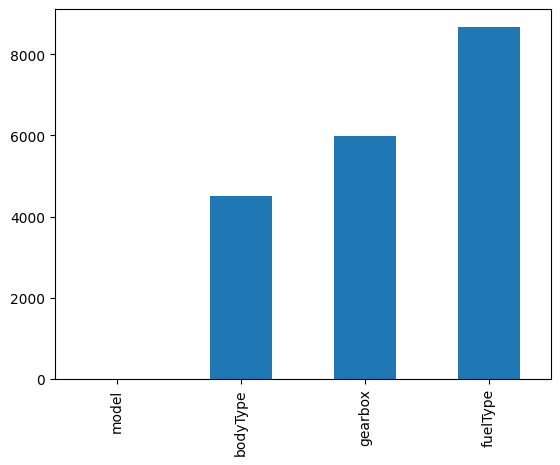

In [7]:
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing.plot.bar()

<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


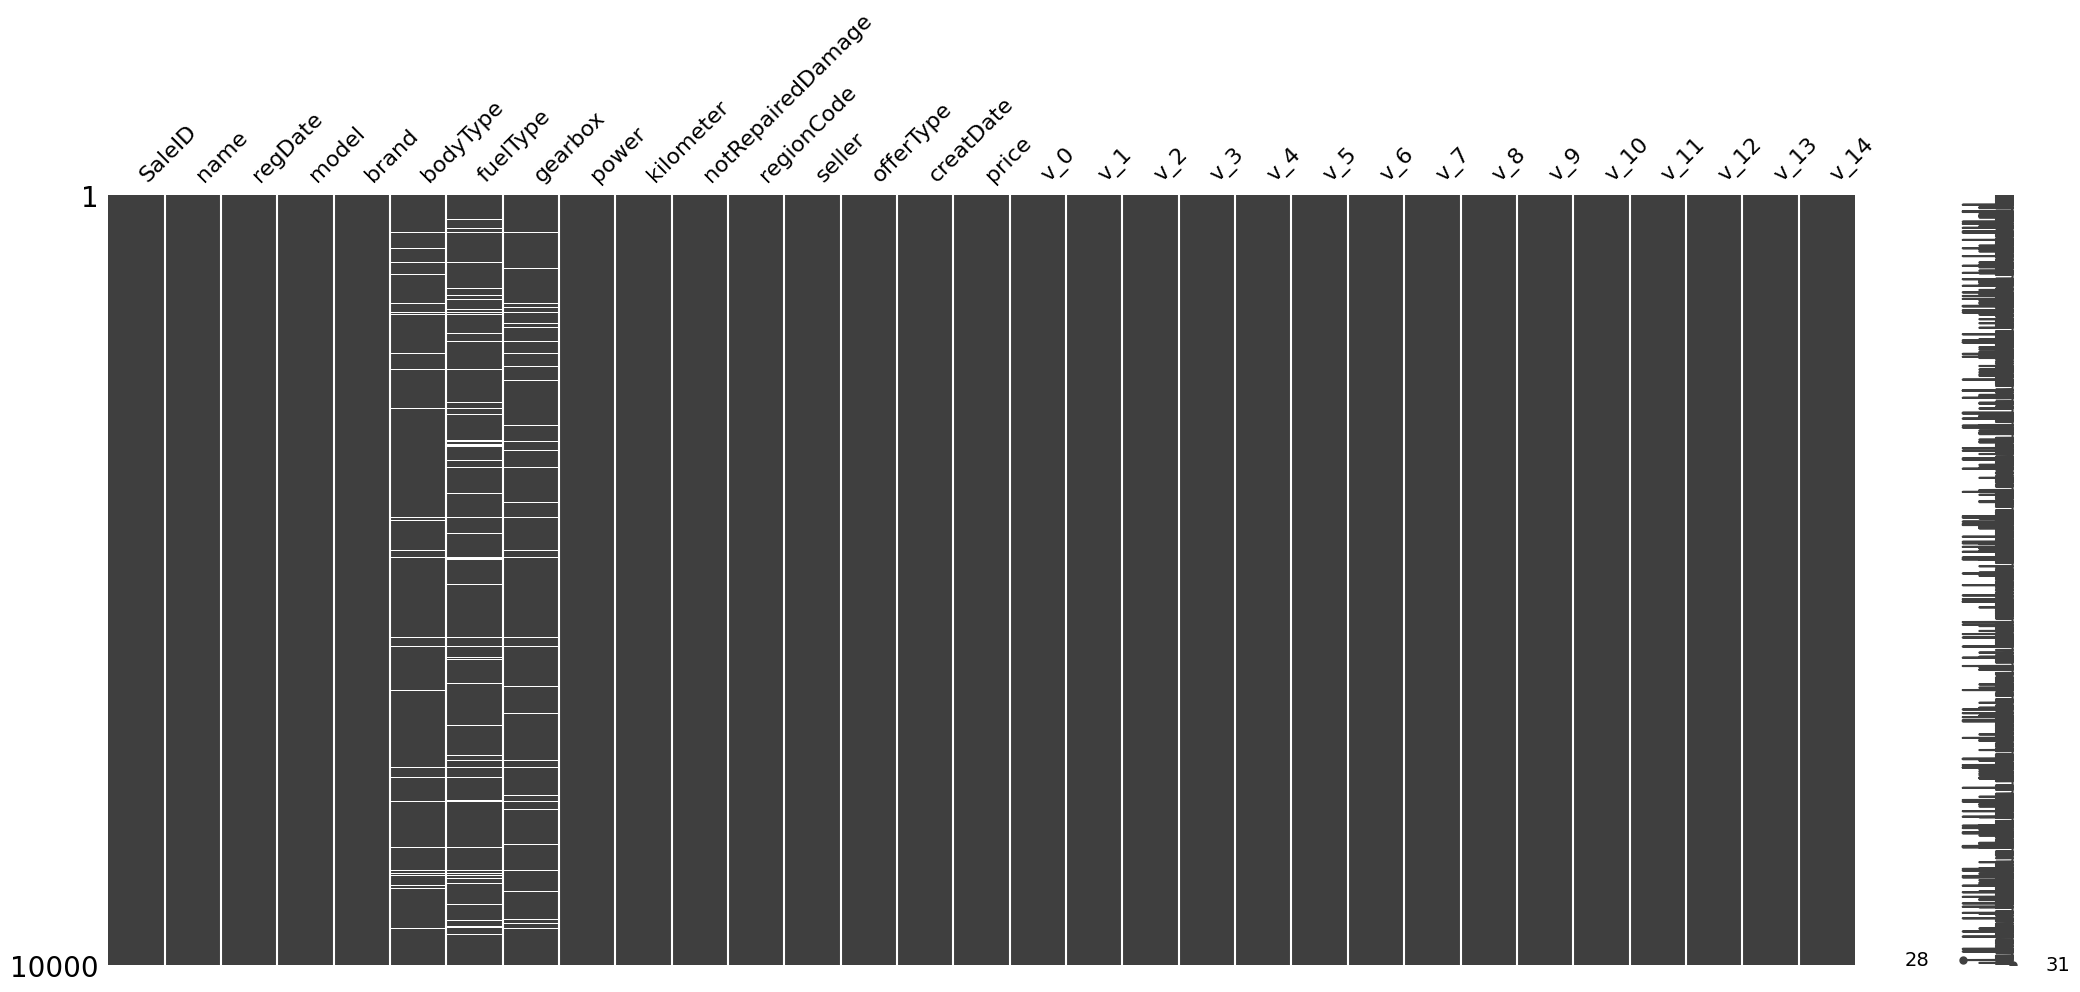

In [8]:
msno.matrix(train_data.sample(10000))

<AxesSubplot:>

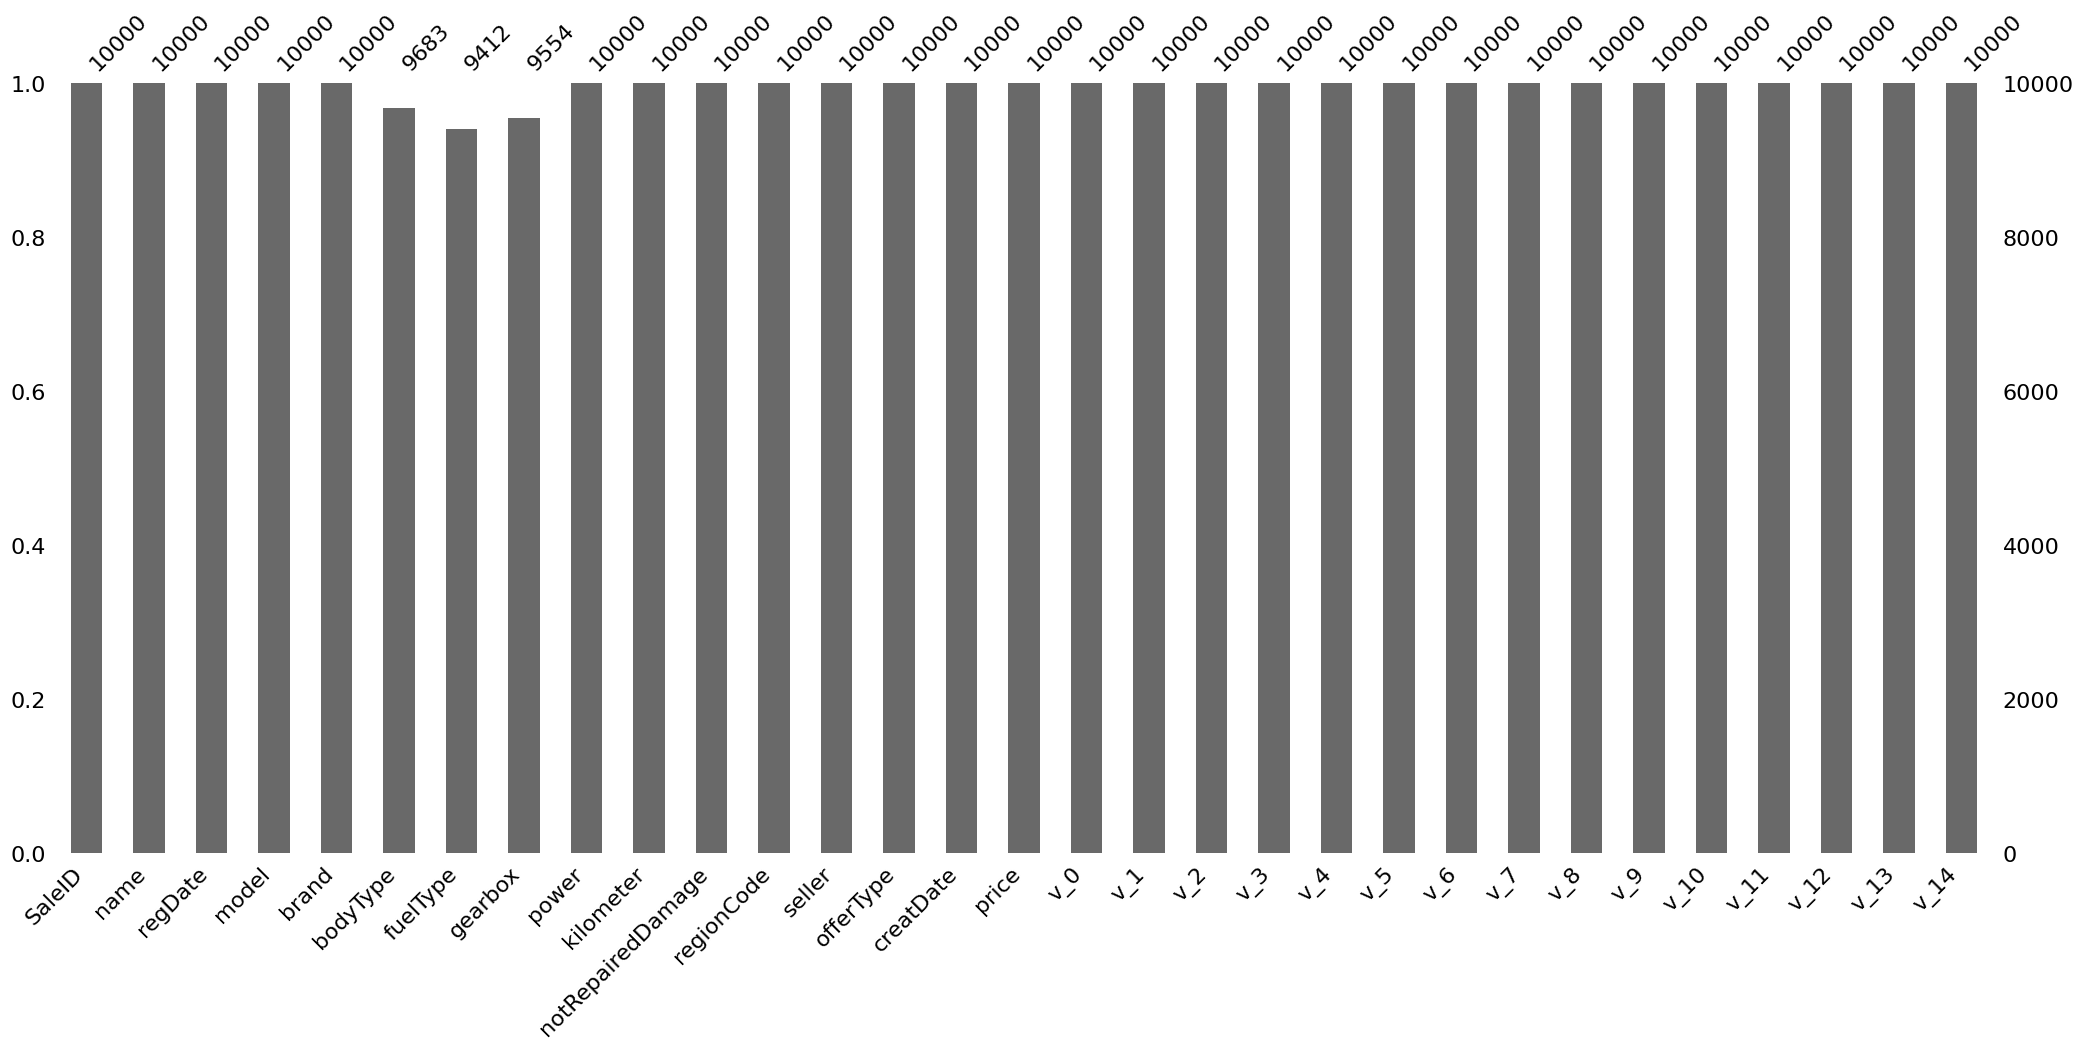

In [9]:
msno.bar(train_data.sample(10000))

In [10]:
train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [11]:
test_data = pd.read_csv("used_car_testB_20200421.csv", sep = " ")
train_data["origin"] = "train"
test_data["origin"] = "test"
data = pd.concat([train_data, test_data], axis = 0, ignore_index = True)

In [12]:
data['notRepairedDamage'].replace("-", np.nan, inplace = True)
data['notRepairedDamage'].value_counts()

0.0    148585
1.0     19022
Name: notRepairedDamage, dtype: int64

In [13]:
data['seller'].value_counts()

0    199999
1         1
Name: seller, dtype: int64

In [14]:
data["offerType"].value_counts()

0    200000
Name: offerType, dtype: int64

In [15]:
del data["seller"]
del data["offerType"]

In [16]:
target = train_data['price']

<AxesSubplot:title={'center':'Log Normal'}, xlabel='price'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


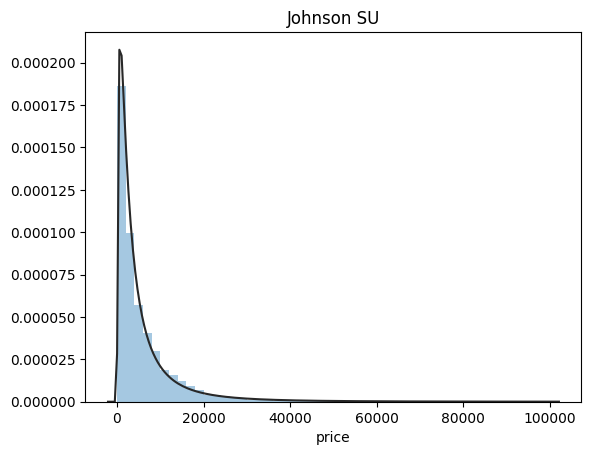

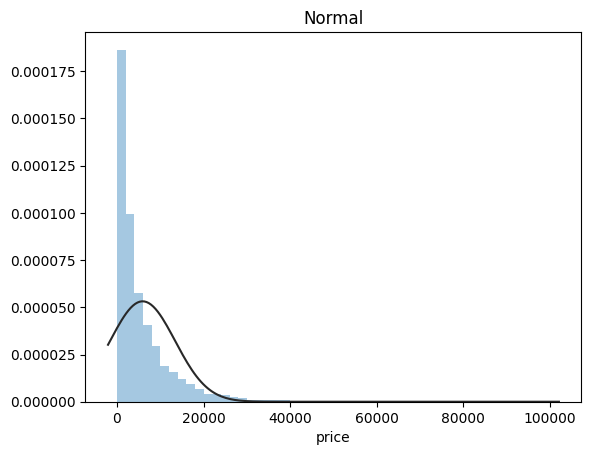

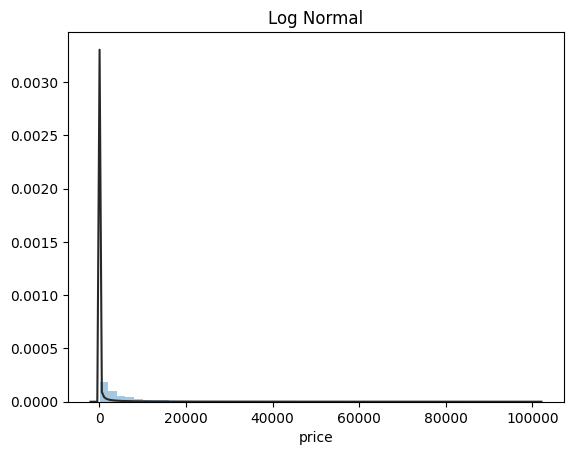

In [17]:
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(target, kde=False, fit=st.johnsonsu)
plt.figure(2)
plt.title('Normal')
sns.distplot(target, kde=False, fit=st.norm)
plt.figure(3)
plt.title('Log Normal')
sns.distplot(target, kde=False, fit=st.lognorm)

偏度: 3.346487
峰度: 18.995183


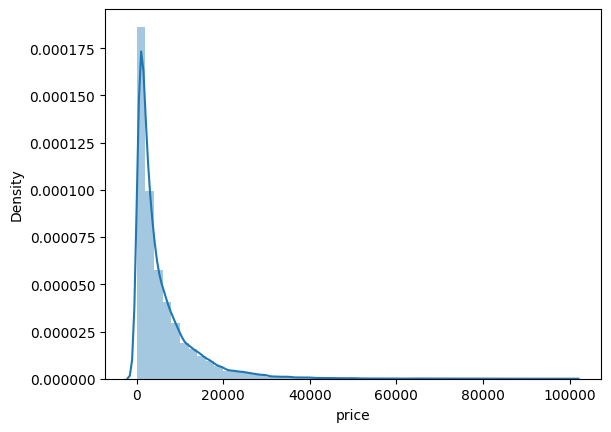

In [18]:
sns.distplot(target);
print("偏度: %f" % target.skew())
print("峰度: %f" % target.kurt())

偏度: -0.265100
峰度: -0.171801


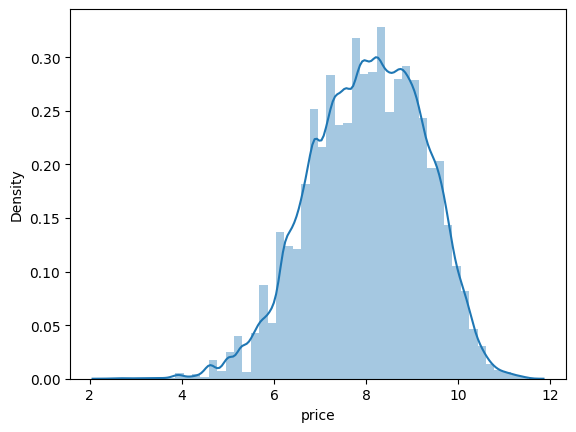

In [19]:
# 需要将其转为正态分布
sns.distplot(np.log(target))
print("偏度: %f" % np.log(target).skew())
print("峰度: %f" % np.log(target).kurt())

In [20]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 
                    'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10',
                    'v_11', 'v_12', 'v_13','v_14' ]
 
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType','gearbox', 'notRepairedDamage', 'regionCode',]

In [21]:
# 对于类别型的特征需要查看其取值有多少个，能不能转换为onehot
for feature in categorical_features:
    print(feature,"特征有{}个取值".format(train_data[feature].nunique()))
    print(train_data[feature].value_counts())

name 特征有99662个取值
708       282
387       282
55        280
1541      263
203       233
         ... 
119983      1
63443       1
104410      1
154956      1
177672      1
Name: name, Length: 99662, dtype: int64
model 特征有248个取值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
240.0        2
209.0        2
245.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand 特征有40个取值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
bodyType 特征有8个取值
0.0    41420
1.0    35272
2.0  

In [22]:
numeric_features.append("price")
price_numeric = train_data[numeric_features]
correlation_score = price_numeric.corr() # 得到是一个特征数*特征数的矩阵，元素都行和列对应特征之间的相关性
correlation_score['price'].sort_values(ascending = False)

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64

<AxesSubplot:title={'center':'相关性展示'}>

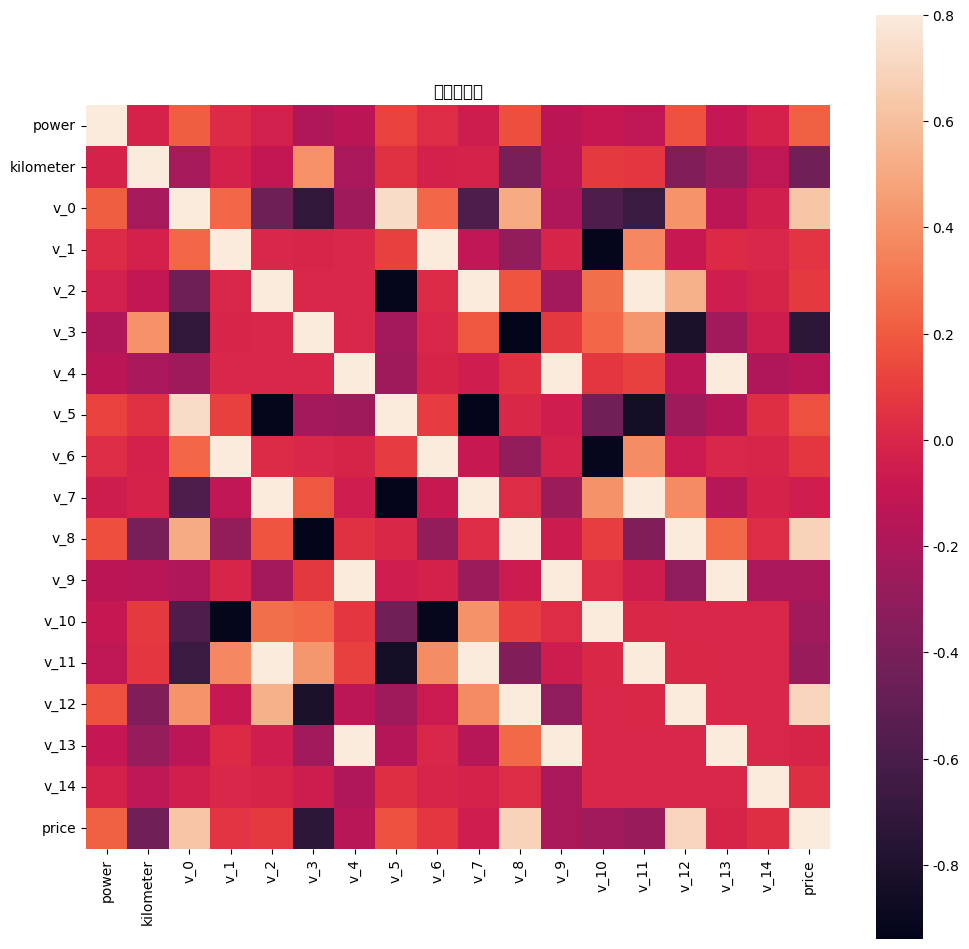

In [23]:
fig,ax = plt.subplots(figsize = (12,12))
plt.title("相关性展示")
sns.heatmap(correlation_score, square = True, vmax = 0.8)

In [24]:
# 查看特征值的偏度和峰度
for col in numeric_features:
    print("{:15}\t Skewness:{:05.2f}\t Kurtosis:{:06.2f}".format(col,
                                                    train_data[col].skew(), 
                                                   train_data[col].kurt()))

power          	 Skewness:65.86	 Kurtosis:5733.45
kilometer      	 Skewness:-1.53	 Kurtosis:001.14
v_0            	 Skewness:-1.32	 Kurtosis:003.99
v_1            	 Skewness:00.36	 Kurtosis:-01.75
v_2            	 Skewness:04.84	 Kurtosis:023.86
v_3            	 Skewness:00.11	 Kurtosis:-00.42
v_4            	 Skewness:00.37	 Kurtosis:-00.20
v_5            	 Skewness:-4.74	 Kurtosis:022.93
v_6            	 Skewness:00.37	 Kurtosis:-01.74
v_7            	 Skewness:05.13	 Kurtosis:025.85
v_8            	 Skewness:00.20	 Kurtosis:-00.64
v_9            	 Skewness:00.42	 Kurtosis:-00.32
v_10           	 Skewness:00.03	 Kurtosis:-00.58
v_11           	 Skewness:03.03	 Kurtosis:012.57
v_12           	 Skewness:00.37	 Kurtosis:000.27
v_13           	 Skewness:00.27	 Kurtosis:-00.44
v_14           	 Skewness:-1.19	 Kurtosis:002.39
price          	 Skewness:03.35	 Kurtosis:019.00


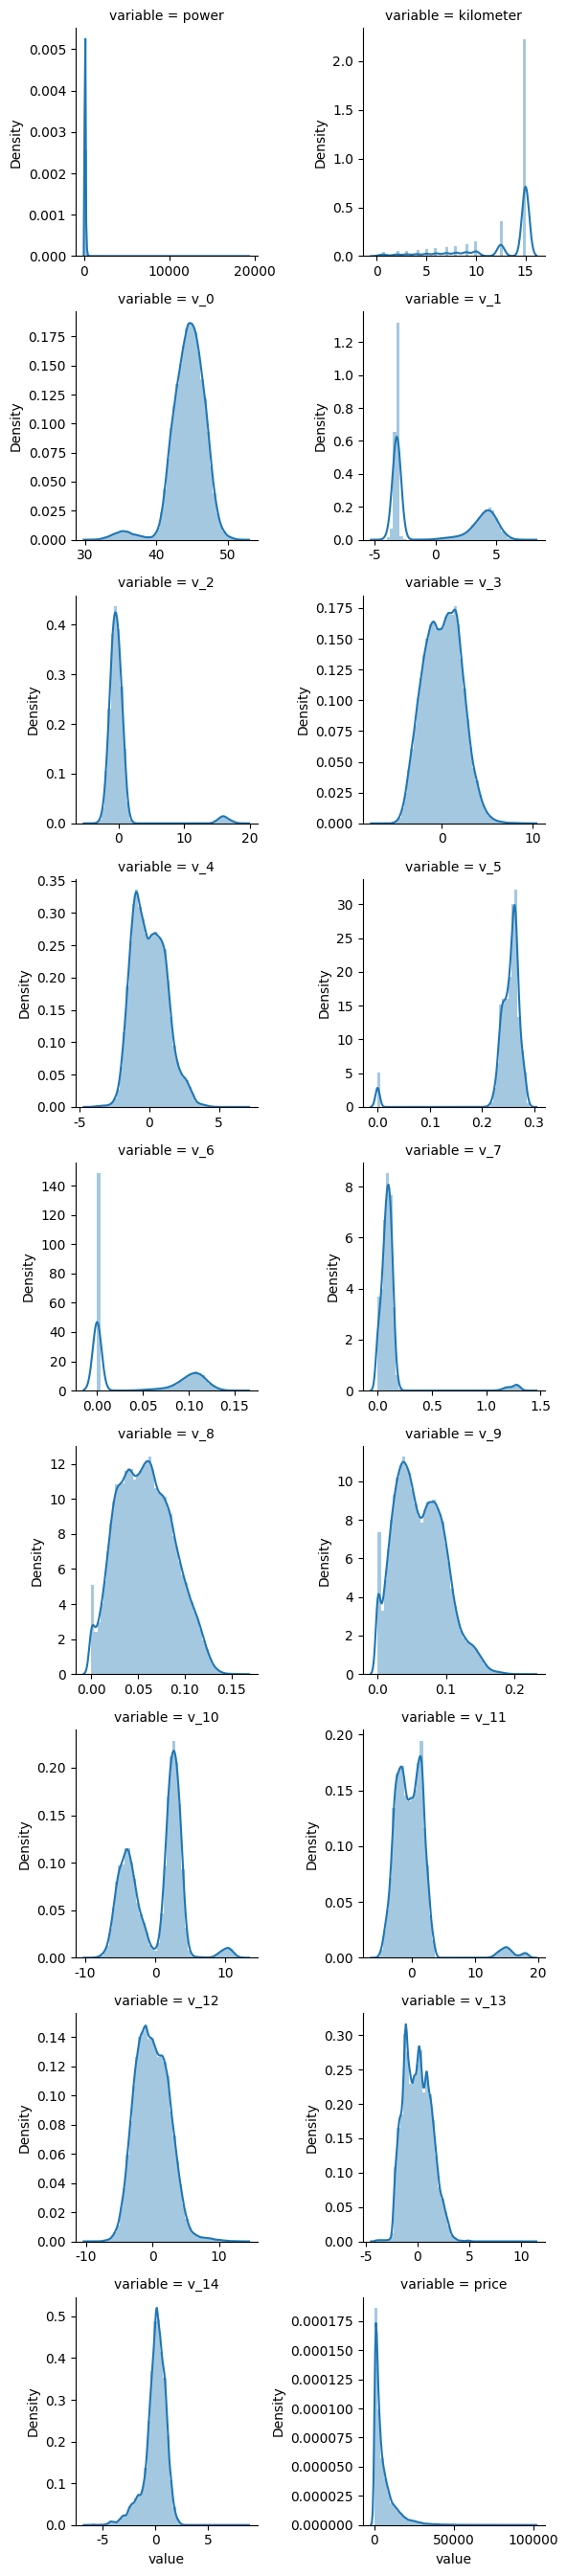

In [25]:
f = pd.melt(train_data, value_vars=numeric_features)
# 这里相当于f是一个两列的矩阵，第一列是原来特征
# 第二列是特征对应的取值，例如power有n个取值，那么它会占据n行，这样叠在一起
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
#g 是产生一个对象，可以用来应用各种图面画图，map应用
# 第一个参数就是dataframe数据，但是要求是长数据，也就是melt处理完的数据
# 第二个参数是用来画图依据的列，valiable是melt处理完，那些特征的列名称
# 而那些值的列名称为value
# 第三个参数col_wrap是代表分成多少列
g = g.map(sns.distplot, "value")

In [26]:
sns.pairplot(train_data[numeric_features], size = 2,  kind = "scatter",diag_kind = "kde")

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f98411aed40> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f98411ae7a0> (for post_execute):


KeyboardInterrupt: 

In [27]:
# 下面对类别特征做处理
categorical_features_2 = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features_2:
    train_data[c] = train_data[c].astype("category")
    # 将这些的类型转换为分类类型，不保留原来的int或者float类型
    if train_data[c].isnull().any():
        # 如果该列存在nan的话
        train_data[c] = train_data[c].cat.add_categories(['Missing'])
        # 增加一个新的分类为missing，用它来填充那些nan，代表缺失值，
        # 这样在后面画图方便展示
        train_data[c] = train_data[c].fillna('Missing')

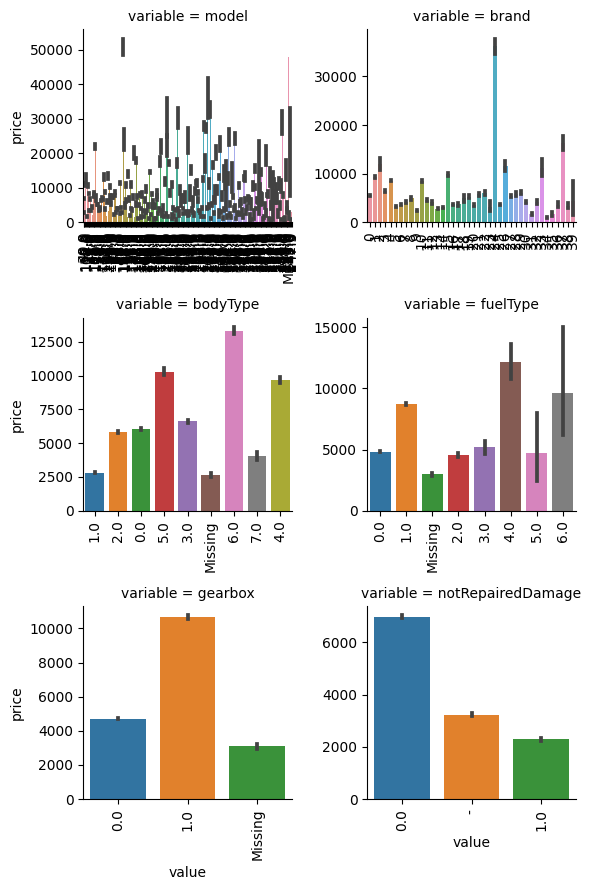

In [28]:
def bar_plot(x, y, **kwargs):
    sns.barplot(x = x, y = y)
    x = plt.xticks(rotation = 90)
    
f = pd.melt(train_data, id_vars = ['price'], value_vars = categorical_features_2)
g = sns.FacetGrid(f, col = 'variable', col_wrap = 2, sharex = False, sharey = False)
g = g.map(bar_plot, "value", "price")

In [29]:
# 主要就是power的值分布太过于异常，那么可以对一些进行处理，删除掉
# 下面定义一个函数用来处理异常值
def outliers_proc(data, col_name, scale = 3):
    # data：原数据
    # col_name：要处理异常值的列名称
    # scale：用来控制删除尺度的
    def box_plot_outliers(data_ser, box_scale):
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        # quantile是取出数据对应分位数的数值
        val_low = data_ser.quantile(0.25) - iqr # 下界
        val_up = data_ser.quantile(0.75) + iqr # 上界
        rule_low = (data_ser < val_low) # 筛选出小于下界的索引
        rule_up = (data_ser > val_up) # 筛选出大于上界的索引
        return (rule_low, rule_up),(val_low, val_up)
    
    data_n = data.copy()
    data_series = data_n[col_name]  # 取出对应数据
    rule, values = box_plot_outliers(data_series, box_scale = scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    # 先产生0到n-1，然后再用索引把其中处于异常值的索引取出来
    print("Delete number is {}".format(len(index)))
    data_n = data_n.drop(index) # 整行数据都丢弃
    data_n.reset_index(drop = True, inplace = True)  # 重新设置索引
    print("Now column number is:{}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]  # 小于下界的值
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the lower bound is:")
    print(pd.Series(outliers).describe())
    fig, axes = plt.subplots(1,2,figsize = (10,7))
    ax1 = sns.boxplot(y = data[col_name], data = data, palette = "Set1", ax = axes[0])
    ax1.set_title("处理异常值前")
    ax2 = sns.boxplot(y = data_n[col_name], data = data_n, palette = "Set1", ax = axes[1])
    ax2.set_title("处理异常值后")
    return data_n

Delete number is 963
Now column number is:149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the lower bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


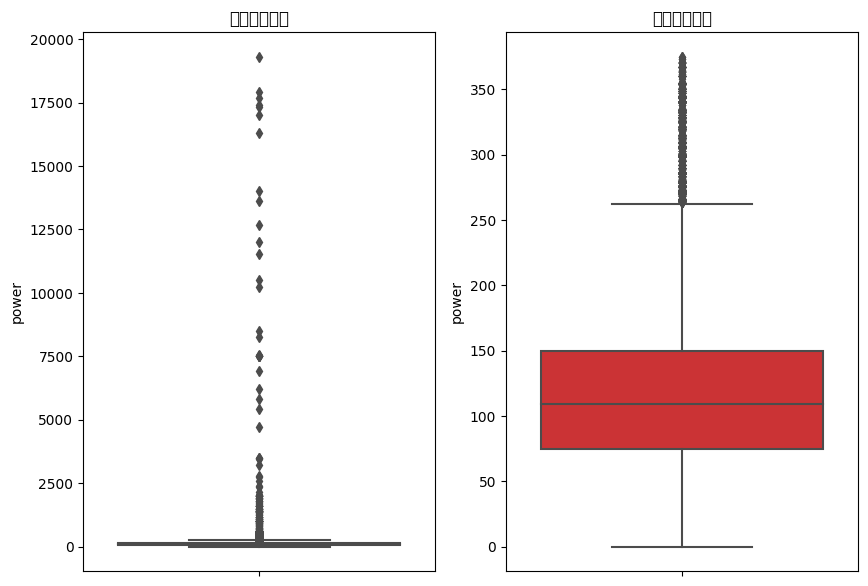

In [30]:
train_data_delete_after = outliers_proc(train_data, "power", scale =3)

In [31]:
bin_power = [i*10 for i in range(31)]
data["power_bin"] = pd.cut(data["power"],bin_power,right = False,labels = False)

In [32]:
data['power_bin'] = data['power_bin'].fillna(31)

In [33]:
data['power'] = np.log(data['power'] + 1) 

In [34]:
data["use_time"] = (pd.to_datetime(data['creatDate'],format = "%Y%m%d",errors = "coerce")
                        - pd.to_datetime(data["regDate"], format = "%Y%m%d", errors = "coerce")).dt.days
# errors是当格式转换错误就赋予nan

In [35]:
# 计算某个品牌的各种统计数目量
train_gb = train_data.groupby("brand")
all_info = {}
for kind, kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data["price"] > 0]
    # 把价格小于0的可能存在的异常值去除
    info["brand_amount"] = len(kind_data) # 该品牌的数量
    info["brand_price_max"] = kind_data.price.max() # 该品牌价格最大值
    info["brand_price_min"] = kind_data.price.min() # 该品牌价格最小值
    info["brand_price_median"] = kind_data.price.median() # 该品牌价格中位数
    info["brand_price_sum"] = kind_data.price.sum() # 该品牌价格总和
    info["brand_price_std"] = kind_data.price.std() # 方差
    info["brand_price_average"] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    # 均值，保留两位小数
    all_info[kind] = info
brand_feature = pd.DataFrame(all_info).T.reset_index().rename(columns = {"index":"brand"})

In [36]:
brand_feature = pd.DataFrame(all_info)
brand_feature

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
brand_amount,3.148000e+04,1.379400e+04,3.210000e+02,2.461000e+03,1.673700e+04,4.665000e+03,1.021700e+04,2.361000e+03,2.077000e+03,7.306000e+03,...,9.400000e+02,318.000000,5.920000e+02,2.180000e+02,227.000000,180.000000,228.000000,3.330000e+02,65.000000,9.000000
brand_price_max,6.850000e+04,9.990000e+04,5.980000e+04,3.750000e+04,9.999900e+04,3.150000e+04,5.990000e+04,3.890000e+04,9.999900e+04,6.853000e+04,...,2.320000e+04,11000.000000,3.350000e+04,8.399000e+04,2900.000000,28900.000000,20900.000000,8.650000e+04,8999.000000,14500.000000
brand_price_min,1.300000e+01,1.500000e+01,3.500000e+01,6.500000e+01,1.200000e+01,2.000000e+01,1.300000e+01,6.000000e+01,3.000000e+01,5.000000e+01,...,5.000000e+01,50.000000,5.000000e+01,9.800000e+02,60.000000,50.000000,150.000000,5.500000e+02,99.000000,750.000000
brand_price_median,3.199000e+03,6.499000e+03,7.700000e+03,4.990000e+03,6.000000e+03,2.300000e+03,1.800000e+03,2.600000e+03,2.299000e+03,1.400000e+03,...,3.295000e+03,1000.000000,2.399500e+03,5.925000e+03,999.000000,950.000000,2250.000000,1.340000e+04,2850.000000,1900.000000
brand_price_sum,1.742533e+08,1.279161e+08,3.864141e+06,1.595423e+07,1.429137e+08,1.542412e+07,3.690217e+07,9.906909e+06,1.017837e+07,1.781404e+07,...,3.939145e+06,560155.000000,2.438785e+06,2.451062e+06,231776.000000,297977.000000,816001.000000,5.427943e+06,215620.000000,39480.000000
brand_price_std,6.272522e+03,9.369631e+03,1.087589e+04,5.396328e+03,8.472393e+03,3.343625e+03,4.681294e+03,4.752033e+03,6.227035e+03,2.974273e+03,...,3.659577e+03,1829.079211,4.567345e+03,1.349101e+04,554.118445,3325.933365,3922.715389,1.354203e+04,2140.083145,5520.867233
brand_price_average,5.535190e+03,9.272640e+03,1.200044e+04,6.480190e+03,8.538280e+03,3.305640e+03,3.611490e+03,4.194290e+03,4.898160e+03,2.437940e+03,...,4.186130e+03,1755.970000,4.112620e+03,1.119206e+04,1016.560000,1646.280000,3563.320000,1.625133e+04,3266.970000,3948.000000


In [37]:
brand_feature = pd.DataFrame(all_info).T.reset_index()
brand_feature

,index,brand_amount,brand_price_max,brand_price_min,brand_price_median,brand_price_sum,brand_price_std,brand_price_average
0,0,31480.0,68500.0,13.0,3199.0,174253290.0,6272.522119,5535.19
1,1,13794.0,99900.0,15.0,6499.0,127916065.0,9369.631497,9272.64
2,2,321.0,59800.0,35.0,7700.0,3864141.0,10875.892891,12000.44
3,3,2461.0,37500.0,65.0,4990.0,15954226.0,5396.327503,6480.19
4,4,16737.0,99999.0,12.0,6000.0,142913696.0,8472.393191,8538.28
5,5,4665.0,31500.0,20.0,2300.0,15424120.0,3343.624586,3305.64
6,6,10217.0,59900.0,13.0,1800.0,36902172.0,4681.293524,3611.49
7,7,2361.0,38900.0,60.0,2600.0,9906909.0,4752.032776,4194.29
8,8,2077.0,99999.0,30.0,2299.0,10178370.0,6227.035419,4898.16
9,9,7306.0,68530.0,50.0,1400.0,17814036.0,2974.272776,2437.94


In [38]:
brand_feature = pd.DataFrame(all_info).T.reset_index().rename(columns = {"index":"brand"})
brand_feature

,brand,brand_amount,brand_price_max,brand_price_min,brand_price_median,brand_price_sum,brand_price_std,brand_price_average
0,0,31480.0,68500.0,13.0,3199.0,174253290.0,6272.522119,5535.19
1,1,13794.0,99900.0,15.0,6499.0,127916065.0,9369.631497,9272.64
2,2,321.0,59800.0,35.0,7700.0,3864141.0,10875.892891,12000.44
3,3,2461.0,37500.0,65.0,4990.0,15954226.0,5396.327503,6480.19
4,4,16737.0,99999.0,12.0,6000.0,142913696.0,8472.393191,8538.28
5,5,4665.0,31500.0,20.0,2300.0,15424120.0,3343.624586,3305.64
6,6,10217.0,59900.0,13.0,1800.0,36902172.0,4681.293524,3611.49
7,7,2361.0,38900.0,60.0,2600.0,9906909.0,4752.032776,4194.29
8,8,2077.0,99999.0,30.0,2299.0,10178370.0,6227.035419,4898.16
9,9,7306.0,68530.0,50.0,1400.0,17814036.0,2974.272776,2437.94


In [39]:
data = data.merge(brand_feature, how='left', on='brand')

In [40]:
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
for feature in ["brand_amount","brand_price_average","brand_price_max",
                "brand_price_median","brand_price_min","brand_price_std",
               "brand_price_sum","power","kilometer"]:
    data[feature] = max_min(data[feature])

In [41]:
# 对类别特征转换为onehot
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType','fuelType','gearbox', 
                                     'notRepairedDamage', 'power_bin'],dummy_na=True)

In [42]:
data = data.drop(['creatDate',"regDate", "regionCode"], axis = 1)

In [43]:
use_feature = [x for x in data.columns if x not in ['SaleID',"name","price","origin"]]
target = data[data["origin"] == "train"]["price"]
target_lg = (np.log(target+1))
 
train_x = data[data["origin"] == "train"][use_feature]
test_x = data[data["origin"] == "test"][use_feature]
 
train_x["use_time"] = train_x["use_time"].fillna(train_x["use_time"].mean())
 
test_x["use_time"] = test_x["use_time"].fillna(train_x["use_time"].mean())# 用训练数据集的均值填充
 
train_x.shape

(150000, 370)

In [44]:
test_x.isnull().sum()

power             0
kilometer         0
v_0               0
v_1               0
v_2               0
                 ..
power_bin_27.0    0
power_bin_28.0    0
power_bin_29.0    0
power_bin_31.0    0
power_bin_nan     0
Length: 370, dtype: int64